## 머신러닝
# 서포트 벡터 머신
- Support Vector Machine (SVM)
- 커널 기법을 활용한 알고리즘으로 속성을 무한히 늘린다

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Support Vector
- 각 클래스를 잘 구분하는 직선을 찾는 방식이다.
- 두 클래스의 가운데 구분선을 그린다. 가장 가까이 있는 점들과의 거리가 가장 큰 직선을 찾는다.
- 이때 가장 가까이 있는 점들을 **Support Vector** 라고 하고, 찾은 직선과 서포트벡터 사이의 거리를 **최대 마진(margin)** 이라 한다.
- 결국 마진을 최대로 하는 서포트벡터와 직선을 찾는 것이 목표이다.
- 참고 자료 : https://en.wikipedia.org/wiki/Support_vector_machine
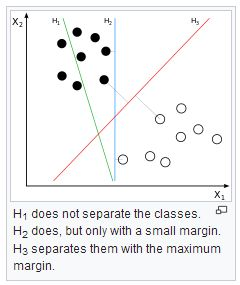
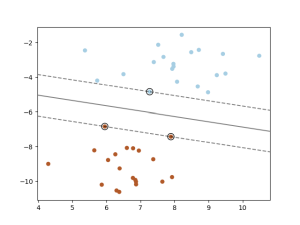

### Linear SVM
- 위와 같이 Support Vector 를 이용해 구분평면을 구한다

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
X = iris.data[:, [0,1]]
y = iris.target.copy()
y[y==2] = 1 # 타겟값을 setosa(0), others(1) 로 설정

X.shape, y.shape

((150, 2), (150,))

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

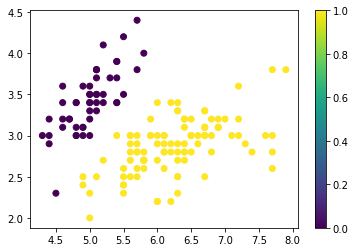

In [5]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.colorbar()

In [7]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X, y)

score = model.score(X, y)
print(score)

0.9933333333333333


In [8]:
model.coef_, model.intercept_

(array([[ 1.52524826, -2.25872362]]), array([-1.18975275]))

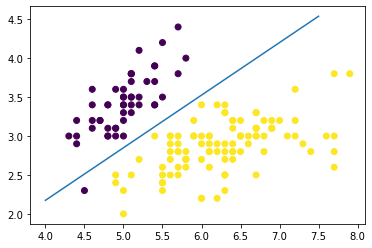

In [9]:
w1, w2 = model.coef_[0]
b = model.intercept_[0]

xs = np.array([4, 7.5])
ys = -(w1*xs + b)/w2

plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(xs, ys)

In [10]:
y_pred = model.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
np.where(y_pred!=y)

(array([41], dtype=int64),)

In [12]:
X[y_pred!=y]

array([[4.5, 2.3]])

### Kernel SVM
- **RBF**(radial basis function) 함수를 이용해 속성을 추가한다
> $ rbf(\vec{x_1}, \vec{x_2}) = exp(- \gamma |\vec{x_1} - \vec{x_2}|^2) $
- 위와 같이 비선형 함수를 이용해 속성이 추가되므로 복잡한 곡선의 결과를 얻을 수 있다
- RBF 는 가까이 있는 점들은 1, 조금만 멀어져도 0 이 되므로 주변에 타원형 경계선을 그리는 효과이다

In [14]:
from sklearn.datasets import load_breast_cancer

In [15]:
cancer = load_breast_cancer()

In [16]:
from sklearn.svm import SVC

In [17]:
X = cancer.data[:, :2]
y = cancer.target

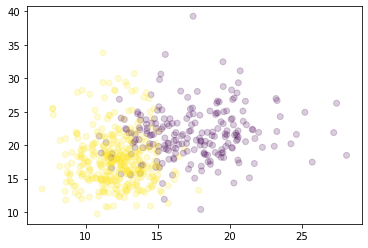

In [18]:
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.2)

In [19]:
model = SVC(probability=True) # probability: 확률점수 계산
model.fit(X, y)
model.score(X, y)

0.9121265377855887

### 결과 출력

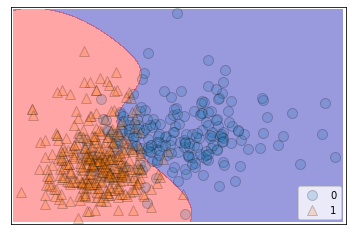

In [20]:
import mglearn
#mglearn.plots.plot_2d_classification(model, X, fill=True, eps=0.5, alpha=0.4)
mglearn.plots.plot_2d_separator(model, X, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X[:,0], X[:,1], y, alpha=0.2)
plt.legend(loc=4)

Text(0.5, 1.0, 'SVM - decision bounds')

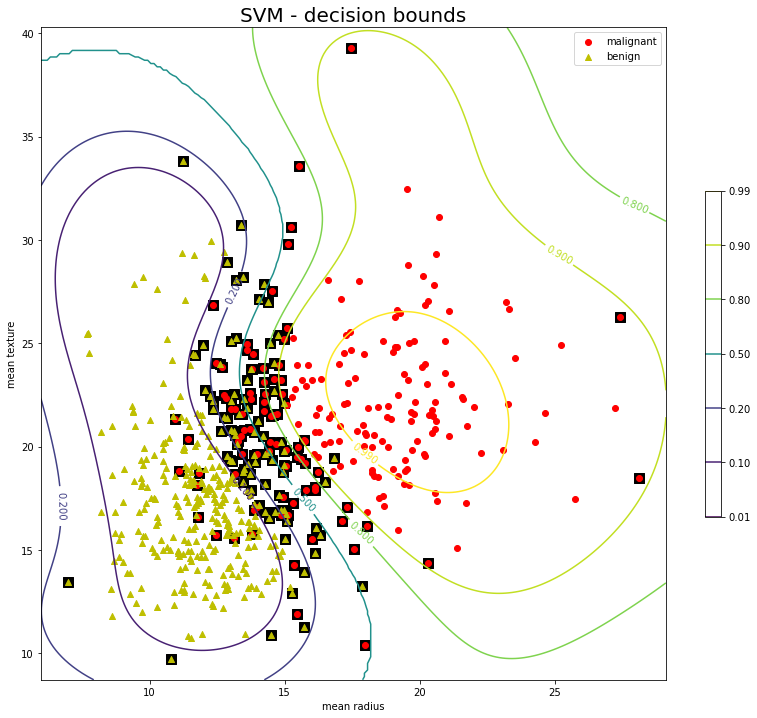

In [21]:
xmax = X[:,0].max()+1
xmin = X[:,0].min()-1
ymax = X[:,1].max()+1
ymin = X[:,1].min()-1

xx=np.linspace(xmin,xmax,200)
yy=np.linspace(ymin,ymax,200)
data1, data2 = np.meshgrid(xx,yy)
X_grid = np.c_[data1.ravel(), data2.ravel()]
decision_values = model.predict_proba(X_grid)[:,0] # 등고선을 위해 확률점수를 구함

sv=model.support_vectors_

fig=plt.figure(figsize=[14,12])

# show probability countour
CS=plt.contour(data1,data2,decision_values.reshape(data1.shape),levels=[0.01, 0.1, 0.2, 0.5, 0.8, 0.9, 0.99])
plt.clabel(CS, inline=2, fontsize=10)

# show support vectors
plt.scatter(sv[:,0], sv[:,1], marker='s', c= 'k', s=100)

# show train samples
plt.scatter(X[:,0][y==0],X[:,1][y==0],marker='o',c='r',label='malignant')
plt.scatter(X[:,0][y==1],X[:,1][y==1],marker='^',c='y',label='benign')

plt.legend()
plt.colorbar(CS,shrink=0.5)
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.title('SVM - decision bounds',fontsize=20)

### SVC 중요 옵션
- C : 값이 커질수록 경계선을 대강 그린다. L1/L2 규제값인 alpha 값의 역수이다
- gamma : RBF 함수의 내부 인자이다. gamma 값이 커질수록 경계선이 뽀족해진다.

In [21]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [22]:
model = SVC(C=10, gamma=10)
model.fit(X, y)
model.score(X, y)

0.9947275922671354

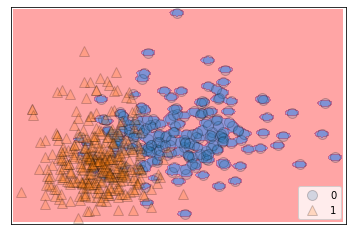

In [23]:
mglearn.plots.plot_2d_separator(model, X, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X[:,0], X[:,1], y, alpha=0.2)
plt.legend(loc=4)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
model = SVC(C=10, gamma=10)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7902097902097902

In [11]:
model = SVC(C=0.1, gamma=0.1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9230769230769231

In [13]:
import mglearn

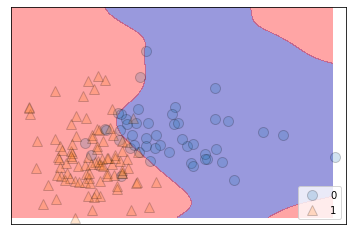

In [14]:
mglearn.plots.plot_2d_separator(model, X_train, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test, alpha=0.2)
plt.legend(loc=4)

### 과적합 이슈
- C=10, gamma=10 일때의 결과가 과연 좋은것인가?
- 학습/테스트 데이터를 분리해서 결과를 보자

In [23]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 2), (143, 2), (426,), (143,))

In [28]:
model = SVC(C=10, gamma=10)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score  = model.score(X_test, y_test)
print(train_score, test_score)

0.9976525821596244 0.7062937062937062


In [31]:
np.bincount(y_test)

array([54, 89], dtype=int64)

In [32]:
89/(54+89)

0.6223776223776224

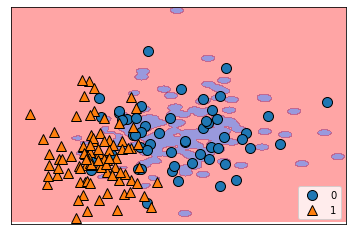

In [30]:
mglearn.plots.plot_2d_separator(model, X, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test)
plt.legend(loc=4)

### 모든 속성 사용

In [24]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [25]:
model = SVC(probability=True)
model.fit(X_train, y_train)
s1 = model.score(X_train, y_train)
s2 = model.score(X_test, y_test)

s1, s2

(0.9107981220657277, 0.8951048951048951)

### SVM 은 반드시 정규화를 적용해야 한다

In [27]:
m = X_train.mean(axis=0)
s = X_train.std(axis=0)

X_train_norm = (X_train - m) / s
X_test_norm = (X_test - m) / s

X_train_norm.shape, X_test_norm.shape

((426, 30), (143, 30))

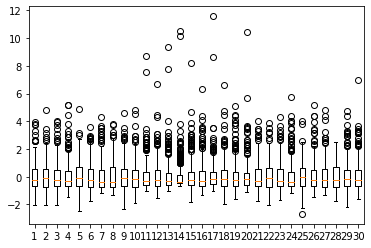

In [30]:
plt.boxplot(X_train_norm); pass

In [31]:
model = SVC(probability=True)
model.fit(X_train_norm, y_train)
s1 = model.score(X_train_norm, y_train)
s2 = model.score(X_test_norm, y_test)

s1, s2

(0.9906103286384976, 0.965034965034965)